<a href="https://colab.research.google.com/github/sergekamanzi/wine_quality/blob/main/red_wine_quality_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing PANDAS for my dataset**

In [2]:
import pandas as pd

In [3]:
# Load datasets for red and white wines
red = pd.read_csv('/content/winequality-red.csv', sep=';')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Statistical Summary and Feature Correlation of Red Wine Data**

In [4]:
%%capture
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap to see relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(red.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Red Wine Features')
plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler


# Features that need scaling
X=red.drop('quality', axis=1)
Y=red['quality']


# Initialize the scaler
scaler = StandardScaler()


# Fit and transform the features
X_scaled = scaler.fit_transform(X)


# Now X_scaled contains the standardized features


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [7]:
# Check the shape of the NumPy arrays
X.shape,Y.shape

((1599, 11), (1599,))

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

**Linear Regression Model for Predicting Red Wine Quality**

In [23]:
model_fit= RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model_fit.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [24]:
training_pred = model_fit.predict(x_train)

In [25]:
# R squared error
error_score = metrics.r2_score(y_train, training_pred)
print("R squared error : ", error_score)

R squared error :  0.8439855052030738


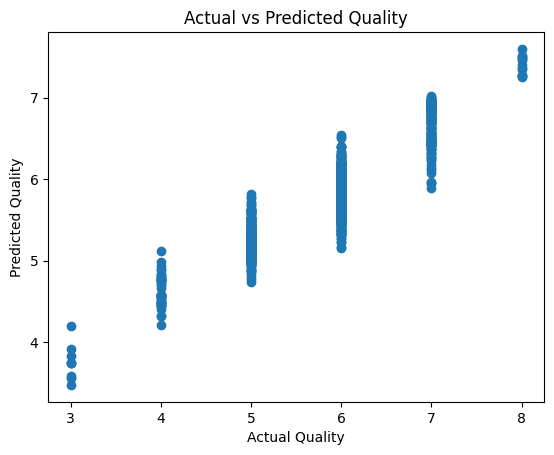

In [26]:

plt.scatter(y_train, training_pred)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Quality")
plt.show()

In [31]:
testing_pred = model_fit.predict(x_test)

In [32]:
# R squared error
error_score = metrics.r2_score(y_test, testing_pred)
print("R squared error : ", error_score)

R squared error :  0.5140359704832456


**Predicting Red Wine Quality Using Linear Regression: User-Input Model**

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings('ignore', message='X does not have valid feature names')


# Select only the features to be used for training and prediction
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'pH', 'alcohol']

# Define X (features) and Y (target)
X = red[selected_features]
Y = red['quality']

# Function to predict wine quality based on user input
def predict_wine_quality():
    # Get input values from the user
    fixed_acidity = float(input("Enter Fixed Acidity: "))
    volatile_acidity = float(input("Enter Volatile Acidity: "))
    citric_acid = float(input("Enter Citric Acid: "))
    residual_sugar = float(input("Enter Residual Sugar: "))
    ph = float(input("Enter pH level: "))
    alcohol = float(input("Enter Alcohol Content: "))

    # Construct the input array for prediction
    features = np.array([[fixed_acidity, volatile_acidity, citric_acid, residual_sugar, ph, alcohol]])

    # Predict the quality using the trained model
    prediction = model_fit.predict(features)[0]

    # Ensure the predicted quality is within the 0-10 range (round to nearest value)
    predicted_quality = round(np.clip(prediction, 0, 10), 2)

    print(f"Predicted Wine Quality (out of 10): {predicted_quality}")

# Call the function to interact with the user
predict_wine_quality()